# Agent-based modelling

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ABM_functions import *
import pandas as pd

#### Setting up parameters

In [2]:
company_titles = ['Department Head', 'Leader', 'Senior', 'Junior'] # job titles for agents in company
n = 100
titles_n = [n, n*10, n*100, n*1000] # number of agents in each job title

# weights for generating agents (populating company + new agents at the lowest level)
weights = {
    'Department Head':{
        'weights': [0.8, 0.2], # first weight is male, second is female
        'age': random.gauss(50, 8),
        'senority': random.gauss(5, 3)}, 
    'Leader':{
        'weights': [0.7, 0.3], 
        'age': random.gauss(40, 6),
        'senority': random.gauss(5, 3)}, 
    'Senior':{
        'weights': [0.6, 0.4],
        'age': random.gauss(35, 6),
        'senority': random.gauss(4, 1)}, 
    'Junior':{
        'weights': None, # equally likely for agents to be male or female
        'age': random.gauss(30, 6),
        'senority':random.gauss(3, 1) }
    }

## Running the agent-based model

tick 0 done
tick 1 done
tick 2 done
tick 3 done
tick 4 done
tick 5 done
tick 6 done
tick 7 done
tick 8 done
tick 9 done


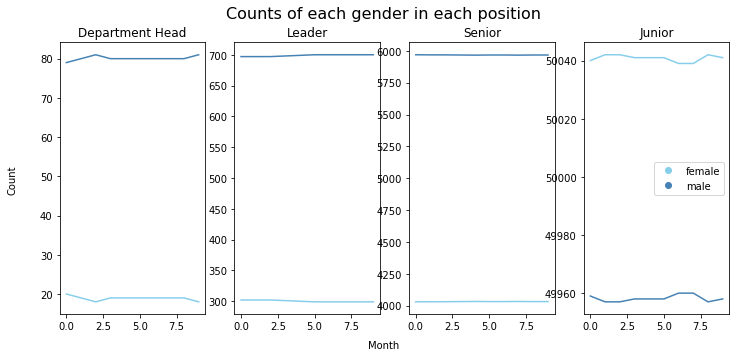

In [4]:
run_abm(months = 10, 
        save_path='data/data.csv', # the path for saving the data
        company_titles = company_titles, # the job titles in the company
        titles_n = titles_n, # the number of employees with each of the titles
        weights = weights, 
        plot_each_tick = False)

### TRYING OUT STUFF BEFORE ADDING TO ABM_FUNCTIONS

In [ ]:
office = create_company(titles=company_titles, n = titles_n)

In [ ]:
# does this even make sense? probably easier just to create the dictionary ourselves???
def weights_agents(company, attribute_list):
    '''
    Creates a dictionary with the information needed to generate agents in each job-title of the company

    Parameters
    ----------
    company: dictionary, 
    '''
    weights = {}
    for i in range(len(company.keys())):
        key = list(company.keys())[i]
        for k in attribute_list:
        value = [None]
        weights[key] = value

    return weights

In [ ]:
['weight', 'age', 'senority']

In [ ]:
weights_agents(office)